In [322]:
from random import random
from random import randint
from random import choice
from numpy import array
from numpy import zeros
import numpy as np
from keras.preprocessing.sequence import pad_sequences

In [80]:
def check_in_frame ( size, pos ):
    """
    Allow space around the shape
    """
    if 0 <= pos[0] < size and  0 <= pos[1] < size:
        return True
    return False

def check_in_frame_with_space ( size, pos ):
    """
    Allow space around the shape
    """
    if 1 <= pos[0] < size - 1 and  1 <= pos[1] < size - 1:
        return True
    return False

def generate_u_shape ( frame, bottom, left, right, direction, position ):
    """
    Impose an U shape structure on the frame, position is where you start it (top-left corner of rectangle)
    
    This is an U-shape with bottom = 4, left = 4, right = 3, direction = 0
    S
    o x x o
    o x x o
    o o o o
    
    S o o o 
    o x x 
    o x x 
    o o o
    
    S o o o
    o x x o
    o x x o
    o 
    
    # Let consider this case in a later phase
    This is an U-shape with bottom = 4, left = 4, right = 3, direction = 1
    
            o
          o
        o x
      o x x x
        o x x x o
          o x o
            o
    We can start with even direction first ( 0 (North), 2 (East), 4 (South), 6(West) )
    The positions marked with x are the positions that are considered inside the U-shape
    
    This function returns whether imposition successes, and frame would be imposed with the U-shape
    
    Parameters:
    =====================
    frame: squared frame
    bottom: integer value
    left: integer value
    right: integer value
    direction: 
    position: tuple of 2
    
    Returns:
    =====================
    - success: whether imposition successes or not
    - inside_points: list of points inside the shape (x)
    
    """
    size = frame.shape[0]
    
    if direction == 0 or direction == 4:
        other_corner = ( position[0] + max(left, right) - 1, position[1] + bottom - 1 )
        
    if direction == 2 or direction == 6:
        other_corner = ( position[0] + bottom - 1, position[1] + max(left, right) - 1 )

    if not check_in_frame_with_space ( size, position) or not check_in_frame_with_space ( size, other_corner ):
        return False, ( [], [] )
    
    # Let's create one U-shape that has a direction == 0, than we rotate it
    inner_shape = np.zeros((max(left, right), bottom))
    # Left side
    for i in range (max(left, right)):
        inner_shape[i,0] = 1
    
    # Right side
    for i in range (max(left, right) - min(left, right), max(left, right)):
        inner_shape[i,bottom - 1] = 1
    
    # Bottom side
    for i in range (bottom):
        inner_shape[max(left, right) - 1,i] = 1
        
    for i in range(max(left, right) - min(left, right), max(left, right) - 1):
        for j in range(1, bottom - 1):
            inner_shape[i,j] = 2
    
    rotated_shape = np.rot90 ( inner_shape, -direction // 2 )
    
    
    frame[ position[0] : position[0] + rotated_shape.shape[0], 
          position[1] : position[1] + rotated_shape.shape[1] ] = rotated_shape
    
    inside_points = np.where(frame == 2)
    
    frame[frame == 2] = 0
    
    return True, inside_points


In [66]:
def check_in_range (value, bottom, left, right, direction, position ):
    """
    bottom, left, right, direction, position is the parameters of U-shape
    
    value is a coordinates (x, y)
    """
    if direction == 0 or direction == 4:
        if position[0] <= value[0] <= position[0] + max(left, right) and position[1] <= value[1] <= position[1] + bottom:
            return True
    
    if direction == 2 or direction == 6:
        if position[0] <= value[0] <= position[0] + bottom and position[1] <= value[1] <= position[1] +  max(left, right):
            return True
    
    return False

In [55]:
a = np.ones((2,3))
np.where(a == 1)

(array([0, 0, 0, 1, 1, 1], dtype=int64),
 array([0, 1, 2, 0, 1, 2], dtype=int64))

In [58]:
f = zeros ((10, 10))
generate_u_shape (f , 4, 4, 3, 4, (5,4) )

(True, (array([6, 6, 7, 7], dtype=int64), array([5, 6, 5, 6], dtype=int64)))

In [59]:
f

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [380]:
def generate_u_shape_frame ( size, bottom_range = list(range(3,5)), 
                  left_range = list(range(3,5)), right_range = list(range(3,5)), 
                  direction_range = list(range(0,8,2)) ):
    frame = zeros((size,size))
    
    # You random a value in those range to add into the frame
    # You also
    bottom = choice(bottom_range)
    left = choice(left_range)
    right = choice(right_range)
    direction = choice(direction_range)
    while True:
        position_x = randint ( 0, size - 1 )
        position_y = randint ( 0, size - 1 )
        position = (position_x, position_y)

        success, inner_list = generate_u_shape  ( frame, bottom, left, right, direction, position )
        
        if success : 
            break
    
    # Random outer position for moving point
    while True:
        pos_start_x = randint ( 0, size - 1 )
        pos_start_y = randint ( 0, size - 1 )
        
        pos_start = (pos_start_x, pos_start_y)
        
        # Just need to be out of the rectangle
        if check_in_range ( pos_start, bottom, left, right, direction, position ):
            continue
            
        break
    
    # Random inner position for moving point
    index = randint ( 0, len(inner_list[0]) - 1 )
    pos_end = (inner_list[0][index], inner_list[1][index])
    
    return frame, pos_start, pos_end

In [381]:
frame, pos_start, pos_end = generate_u_shape_frame ( 10 )

In [382]:
frame

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [131]:
pos_start

(7, 9)

In [135]:
pos_end

(4, 4)

In [138]:
def get_neighbors ( size, pos ):
    neighbors = []
    for i in range(-1, 2):
        for j in range(-1, 2):
            if (i == 0 or j == 0) and not i == j == 0:
                new_pos = (pos[0] + i, pos[1] + j)
                if check_in_frame ( size, new_pos ):
                    neighbors.append(new_pos)
    return neighbors
    

def generate_path ( frame, pos_start, pos_end ):
    size = frame.shape[0]
    # Keep track of the previous cell that has been expanded to
    parent = {}
    
    ### There is nothing too difficult here, we run overflow algorithm to cover the space
    f = frame.copy()
    f[pos_start] = 2
    f[pos_end] = 3
    
    explore_list = [ pos_start ]
    
    def search ( l ):
        while l:
            # Get the shortest path to the pos_end
            new_explore_list = []

            for pos in l:
                for n in get_neighbors( size, pos ):
                    if f[n] == 3:
                        # Found
                        parent[n] = pos
                        return
                    if f[n] == 0:
                        # Add into new list
                        new_explore_list.append(n)
                        parent[n] = pos
                        # 4 is marked
                        f[n] = 4
            l = new_explore_list
        
    
    search ( explore_list )
    cur = pos_end
    
    path = []
    while cur in parent:
        path.append(cur)
        cur = parent[cur]
    
    path.append(cur)
    return path[::-1]

In [139]:
generate_path ( frame, pos_start, pos_end )

[(7, 9), (6, 9), (5, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (4, 4)]

In [349]:
def build_frames(size, env_generator ):
    frames = list()
    # create the first frame
    frame, pos_start, pos_end = env_generator ( size )
    
    # If it is enter (enter = 1): start with pos_start, end with pos_end
    # If it is exit (exit = 1): start with pos_end, end with pos_start
    r = random()
    print (r)
    enter = 1 if r < 0.5 else 0
    
    if enter == 0:
        pos_start, pos_end = (pos_end, pos_start)
        
    path = generate_path ( frame, pos_start, pos_end )
    
    for step in path:
        f = frame.copy()
        f[step] = 1
        frames.append(f)
        
    return frames, enter

In [160]:
from matplotlib import pyplot

0.43449652360631996
Enter
15


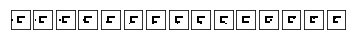

In [383]:
size = 12
frames, enter = build_frames(size, lambda size: generate_u_shape_frame(size, bottom_range = list(range(3,6)), 
                  left_range = list(range(3,6)), right_range = list(range(3,6)) ))
if enter == 1:
    print ('Enter')
else:
    print ('Exit')
    
print (len(frames))
# plot all frames
pyplot.figure()
for i in range(len(frames)):
    # create a gray scale subplot for each frame
    pyplot.subplot(1, len(frames), i + 1)
    pyplot.imshow(frames[i], cmap='Greys')
    # turn of the scale to make it clearer
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
# show the plot
pyplot.show()

In [525]:
def build_frames_pad(size, length, env_generator, padding_start = False ):
    """
    Limit the length of the session, or adding cloned frame if needed
    """
    frames = list()
    # create the first frame
    frame, pos_start, pos_end = env_generator ( size )
    if frame is None:
        return None, None
    
    # If it is enter (enter = 1): start with pos_start, end with pos_end
    # If it is exit (exit = 1): start with pos_end, end with pos_start
    r = random()
    enter = 1 if r < 0.5 else 0
    
    if enter == 0:
        pos_start, pos_end = (pos_end, pos_start)
        
    path = generate_path ( frame, pos_start, pos_end )
    
    for step in path:
        f = frame.copy()
        f[step] = 1
        frames.append(f)
        
    if len(frames) > length:
        """
        Randomly drop some frames, just not the first and last ones
        """
        while len(frames) > length:
            drop_index = randint(1, len(frames) - 2)
            frames.pop(drop_index)
    
    if len(frames) < length:
        if padding_start:
            frames = [frames[0]] * (length - len(frames)) + frames
        else:
            frames = frames + [frames[-1]] * (length - len(frames))
        
        
    return frames, enter

In [384]:
frames, enter = build_frames_pad(size, 10, lambda size: generate_u_shape_frame(size, bottom_range = list(range(3,6)), 
                  left_range = list(range(3,6)), right_range = list(range(3,6)) ))

In [357]:
print (len(frames))

10


In [422]:
def plot( sample ):
    sample = array(sample)
    sample = sample.reshape(sample.shape[0], sample.shape[1], sample.shape[2], 1)
    pyplot.figure()
    for i in range(len(sample)):
        # create a gray scale subplot for each frame
        pyplot.subplot(1, len(sample), i + 1)
        pyplot.imshow(sample[i,:,:,0], cmap='Greys')
        # turn of the scale to make it clearer
        ax = pyplot.gca()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    # show the plot
    pyplot.show()

In [528]:
# generate multiple sequences of frames and reshape for network input
def generate_examples(size, length, n_patterns, env_generator):
    X, y = list(), list()
    while len(X) < n_patterns:
        frames, enter = build_frames_pad(size, length, env_generator)
        if not frames is None:
            X.append(frames)
            y.append(enter)
    
    # resize as [samples, timesteps, width, height, channels]
    X = array(X).reshape(n_patterns, length, size, size, 1)
    y = array(y).reshape(n_patterns, 1)
    return X, y

In [471]:
X, y = generate_examples(12, 15, 20000, shape_generator)

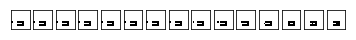

In [318]:
plot(X[0])

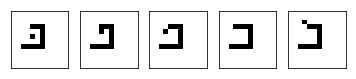

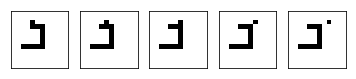

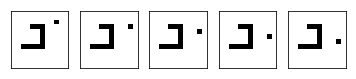

In [274]:
for i in range( len(X[3]) // 5 ):
    plot(X[3][5 * i:5 * i + 5])

In [294]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.optimizers import Adam

In [287]:
print (X.shape)

(20000, 15, 12, 12, 1)


In [482]:
# configure problem
# define the model
model = Sequential()
model.add(TimeDistributed(Conv2D(4, (2,2), activation='relu'),
input_shape=(None,size,size,1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
# model.add(TimeDistributed(Conv2D(4, (2,2), activation='relu'),
# input_shape=(None,size,size,1)))
# model.add(TimeDistributed(MaxPooling2D(pool_size=(2, 2))))
model.add(TimeDistributed(Flatten()))

model.add(LSTM(100))
model.add(Dense(1, activation='sigmoid'))

opt = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.01, amsgrad=False)

model.compile(loss='binary_crossentropy', optimizer = opt , metrics=['acc'])
print(model.summary())

model.fit(X, y, batch_size=32, epochs=1)

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_76 (TimeDis (None, None, 11, 11, 4)   20        
_________________________________________________________________
time_distributed_77 (TimeDis (None, None, 5, 5, 4)     0         
_________________________________________________________________
time_distributed_78 (TimeDis (None, None, 100)         0         
_________________________________________________________________
lstm_16 (LSTM)               (None, 100)               80400     
_________________________________________________________________
dense_16 (Dense)             (None, 1)                 101       
Total params: 80,521
Trainable params: 80,521
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/1
20000/20000 [==============================] - 60s 3ms/step - loss: 0.4774 - acc: 0.7500


In [484]:
shape_generator = lambda size: generate_u_shape_frame(size, bottom_range = list(range(3,6)), 
                  left_range = list(range(3,6)), right_range = list(range(3,6)) )
# evaluate model
X_evaluate, y_evaluate = generate_examples(size, 15, 100, shape_generator)
loss, acc = model.evaluate(X_evaluate, y_evaluate, verbose=0)
print('loss: %f, acc: %f' % (loss, acc*100))
# prediction on new data
X_test, y_test = generate_examples(size, 15, 1, shape_generator)
yhat = model.predict_classes(X_test, verbose=0)
expected = "Enter" if y_test[0]==1 else "Exit"
predicted = "Enter" if yhat[0]==1 else "Exit"
print('Expected: %s, Predicted: %s' % (expected, predicted))

loss: 0.228578, acc: 91.000000
Expected: Exit, Predicted: Exit


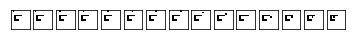

In [323]:
plot(X_evaluate[0])

In [450]:
def generate_jar_shape ( frame, width, height, bulb, side, side_start, side_len, direction, position ):
    """
    Impose an jar shape structure on the frame, position is where you start it (top-left corner of rectangle).
    This is actually a variance of the U-shape.
    The main difference is 
    
    All of the followings have direction = 0, S is where position is
    
    width = 3, height = 5, bulb = 1 (bulb extended by 1 cell), side = 0 (left, 1 for right), 
    side_start = 1 (from the top), side_len = 3 ( side_start + side_len < height )
    
      
    S o x o
    o o x o
    o x x o
    o o x o
      o o o
    
    side_start = 2
    
    S o x o
      o x o
    o o x o
    o x x o
    o o o o
    
    bulb = 2, side_start = 2
    S   o x o
        o x o
    o o o x o
    o x x x o
    o o o o o
    
    This function returns whether imposition successes, and frame would be imposed with the jar-shape
    
    Parameters:
    =====================
    frame: squared frame
    width: width of the main rectangular
    height: height of the main rectangular
    bulb: 
    side: 
    side_start: 
    side_len:
    direction: 
    position: tuple of 2
    
    Returns:
    =====================
    - success: whether imposition successes or not
    - inside_points: list of points inside the shape (x)
    
    """
    size = frame.shape[0]
    
    if direction == 0 or direction == 4:
        other_corner = ( position[0] + height - 1, position[1] + width + bulb - 1 )
        
    if direction == 2 or direction == 6:
        other_corner = ( position[0] + width + bulb - 1, position[1] + height - 1 )

    if not check_in_frame_with_space ( size, position) or not check_in_frame_with_space ( size, other_corner ):
        return False, ( [], [] )
    
    if side_start + side_len >= height:
        return False, ( [], [] )
    
    # Let's create one jar-shape that has a direction == 0, and side = 0
    inner_shape = np.zeros((height, width + bulb))

    # Right side: draw straight line
    for i in range (height):
        inner_shape[i,-1] = 1
    
    # Left side bulb: 5 segments
    for i in range (0, side_start):
        inner_shape[i, bulb] = 1
    
    for i in range (0, bulb + 1):
        inner_shape[side_start, i] = 1
        
    for i in range (side_start, side_start + side_len):
        inner_shape[i, 0] = 1
        
    for i in range (0, bulb + 1):
        inner_shape[side_start + side_len, i] = 1
    
    for i in range (side_start + side_len, height):
        inner_shape[i, bulb] = 1
    
    # Bottom side
    for i in range (bulb, width + bulb):
        inner_shape[height - 1, i] = 1
    
    # Jar inner
    for i in range(0, height - 1):
        for j in range(bulb + 1, width + bulb - 1):
            inner_shape[i,j] = 2
    
    # Bulb inner
    for i in range(side_start + 1, side_start + side_len):
        for j in range(1, width):
            inner_shape[i,j] = 2
    
    if side == 1:
        # Flip through the Oy axis
        inner_shape = inner_shape[:,::-1]
        
    rotated_shape = np.rot90 ( inner_shape, -direction // 2 )
    
    frame[ position[0] : position[0] + rotated_shape.shape[0], 
          position[1] : position[1] + rotated_shape.shape[1] ] = rotated_shape
    
    inside_points = np.where(frame == 2)
    
    frame[frame == 2] = 0
    
    return True, inside_points

In [410]:
f = np.zeros((12, 12))
generate_jar_shape ( frame, 4, 5, 2, 0, 1, 2, 2, (3,3) )

(True,
 (array([4, 5, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 7, 9], dtype=int64),
  array([5, 5, 4, 5, 6, 7, 8, 9, 4, 5, 6, 7, 8, 9, 7], dtype=int64)))

In [451]:
def check_in_range_jar (value, width, height, bulb, direction, position ):
    """
    
    value is a coordinates (x, y)
    """
    if direction == 0 or direction == 4:
        other_corner = ( position[0] + height - 1, position[1] + width + bulb - 1 )
        
    if direction == 2 or direction == 6:
        other_corner = ( position[0] + width + bulb - 1, position[1] + height - 1 )
        
    if position[0] <= value[0] <= other_corner[0] and position[1] <= value[1] <= other_corner[1]:
        return True
    
    return False

In [500]:
def generate_jar_shape_frame ( size, width_range = list(range(3,6)), 
                  height_range = list(range(4,7)), bulb_range = list(range(1,3)),
                  side_start_range = list(range(0,3)), side_len_range = list(range(2,4)),
                  direction_range = list(range(0,8,2)) ):
    frame = zeros((size,size))
    
    # You random a value in those range to add into the frame
    # You also
    
    width = choice(width_range)
    height = choice(height_range)
    bulb = choice(bulb_range)
    side = choice([0,1])
    side_start = choice(side_start_range)
    side_len = choice(side_len_range)
    direction = choice(direction_range)
    
    for _ in range(20):
        position_x = randint ( 0, size - 1 )
        position_y = randint ( 0, size - 1 )
        position = (position_x, position_y)

        success, inner_list = generate_jar_shape  ( frame, width, height, bulb, side, 
                                                 side_start, side_len, direction, position )
        
        
        if success :
            break
    else:
        return None, None, None
    
    # Random outer position for moving point
    for _ in range(20):
        pos_start_x = randint ( 0, size - 1 )
        pos_start_y = randint ( 0, size - 1 )
        
        pos_start = (pos_start_x, pos_start_y)
        
        # Just need to be out of the rectangle
        if not check_in_range_jar ( pos_start, width, height, bulb, direction, position ):
            break
    else:
        return None, None, None
    
    # Random inner position for moving point
    index = randint ( 0, len(inner_list[0]) - 1 )
    pos_end = (inner_list[0][index], inner_list[1][index])
    
#     frame[pos_start] = 3
#     frame[pos_end] = 4
    
    return frame, pos_start, pos_end

In [513]:
frame, pos_start, pos_end = generate_jar_shape_frame ( 12 )

In [514]:
frame

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [455]:
pos_start

(8, 0)

In [456]:
pos_end

(5, 6)

In [517]:
frames, enter = build_frames_pad(size, 15, lambda size: generate_jar_shape_frame(size ))

In [518]:
print (frames[0].shape)

(12, 12)


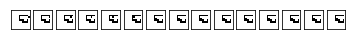

In [519]:
plot(frames)

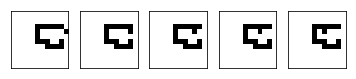

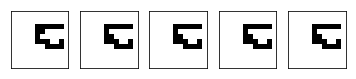

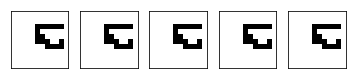

In [520]:
for i in range( len(frames) // 5 ):
    plot(frames[5 * i:5 * i + 5])

In [540]:
jar_generator = lambda size: generate_jar_shape_frame(size )
jar_X, jar_y = generate_examples(12, 15, 500, jar_generator)

In [541]:
loss, acc = model.evaluate(jar_X, jar_y, verbose=0)
print('loss: %f, acc: %f' % (loss, acc*100))

loss: 0.636424, acc: 74.400000


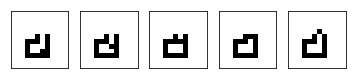

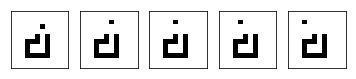

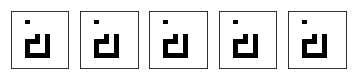

In [533]:
for i in range( len(jar_X[0]) // 5 ):
    plot(jar_X[0][5 * i:5 * i + 5])